In [ ]:


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


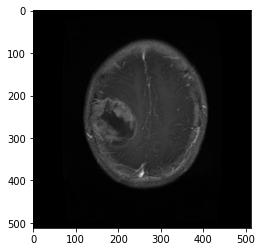

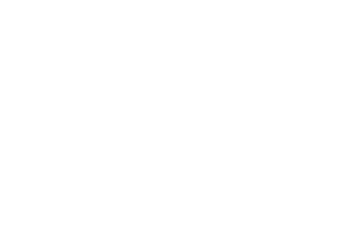

In [ ]:
#Reading the training images from the path and labelling them into the given categories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

DATADIR = r"/content/drive/MyDrive/MIT Capstone Project Group 2/Dataset/Training"
CATEGORIES = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        plt.axis("off")
        break
    break

(-0.5, 223.5, 223.5, -0.5)

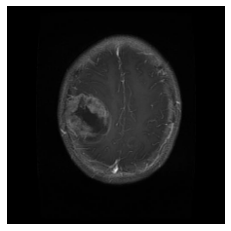

In [ ]:
#Reshaping all the images to 224X224
IMG_SIZE = 224
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))    
plt.imshow(new_array,cmap = "gray")
plt.axis("off")

In [ ]:
#Storing all the training images
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) 
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [ ]:
X_train = []
y_train = []
for features_train,label_train in training_data:
    X_train.append(features_train)
    y_train.append(label_train)
X_train = np.array(X_train).reshape(-1,IMG_SIZE,IMG_SIZE)
print(X_train.shape)
X_train = X_train/255.0  
X_train = X_train.reshape(-1,224,224,1)


(2881, 224, 224)


Load the test images in the same way

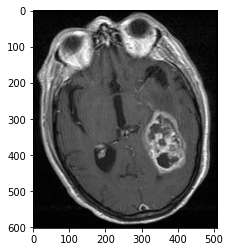

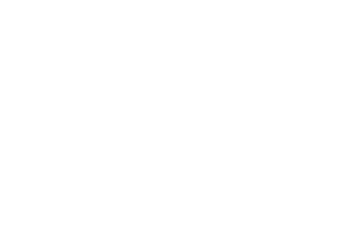

In [ ]:
DATADIR = r"/content/drive/MyDrive/MIT Capstone Project Group 2/Dataset/Testing"
CATEGORIES = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array1 = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array1)
        plt.show()
        plt.axis("off")
        break
    break

(-0.5, 223.5, 223.5, -0.5)

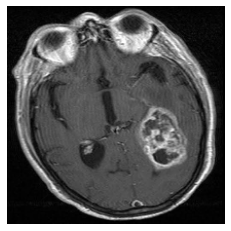

In [ ]:
#Reshaping all the images to 224X224
IMG_SIZE = 224
new_array1 = cv2.resize(img_array1,(IMG_SIZE,IMG_SIZE))    
plt.imshow(new_array1,cmap = "gray")
plt.axis("off")

In [ ]:
#Storing all the testing images
test_data = []
CATEGORIES = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]
def create_test_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array1 = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array1,(IMG_SIZE,IMG_SIZE)) 
                test_data.append([new_array,class_num])
            except Exception as e:
                pass
create_test_data()

In [ ]:

X_test = []
y_test = []
for features_test,label_test in test_data:
    X_test.append(features_test)
    y_test.append(label_test)
X_test = np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE)
print(X_test.shape)
X_test = X_test/255.0  
X_test = X_test.reshape(-1,224,224,1)



(402, 224, 224)


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [ ]:
## Importing the required libraries
import numpy as np
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical as ms 

# fix random seed for reproducibility
seed = 7

np.random.seed(seed)

In [ ]:

from keras.datasets import cifar10

y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

In [ ]:

from tensorflow.keras import losses
from tensorflow.keras import optimizers

import pandas as pd
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler


basemodel = keras.applications.DenseNet201( 
    weights="imagenet",
    input_tensor=keras.Input(shape=(224, 224, 3)),
    include_top=False
)

74842112/74836368 [==============================] - 1s 0us/step


In [ ]:
basemodel.summary()

Model: "densenet201"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [ ]:
# Freeze the basemodel weights , so these weights won't change during training
basemodel.trainable = False

In [ ]:
from tensorflow import image,convert_to_tensor
x_train_=image.grayscale_to_rgb(
    convert_to_tensor(X_train)
)
x_test_=image.grayscale_to_rgb(
    convert_to_tensor(X_test)
)

In [ ]:
# Add classification head to the model

headmodel = basemodel.output
headmodel = GlobalAveragePooling2D(name = 'global_average_pool')(headmodel)
headmodel = Flatten(name= 'flatten')(headmodel)
headmodel = Dense(224, activation = "relu", name = 'dense_1')(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(128, activation = "relu", name = 'dense_2')(headmodel)
headmodel = Dropout(0.2)(headmodel)
headmodel = Dense(4, activation = 'softmax', name = 'dense_3')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [ ]:
# compile the model
opt = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",
    
)
model.compile(loss = 'categorical_crossentropy', optimizer= opt , metrics= ["accuracy"])

In [ ]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)


      
X_train= np.array(X_train)   
X_test= np.array(X_test)   
y_train= np.array(y_train)
y_test = np.array(y_test)


history = model.fit(x_train_,y_train_encoded, epochs = 10,validation_data= (x_test_,y_test_encoded) )

Epoch 1/10
91/91 [==============================] - 36s 220ms/step - loss: 1.0033 - accuracy: 0.5889 - val_loss: 1.2331 - val_accuracy: 0.5597
Epoch 2/10
91/91 [==============================] - 15s 166ms/step - loss: 0.5204 - accuracy: 0.8047 - val_loss: 1.0802 - val_accuracy: 0.6368
Epoch 3/10
91/91 [==============================] - 15s 168ms/step - loss: 0.3940 - accuracy: 0.8454 - val_loss: 1.1745 - val_accuracy: 0.6468
Epoch 4/10
91/91 [==============================] - 15s 169ms/step - loss: 0.3536 - accuracy: 0.8695 - val_loss: 0.9035 - val_accuracy: 0.6990
Epoch 5/10
91/91 [==============================] - 15s 171ms/step - loss: 0.3845 - accuracy: 0.8548 - val_loss: 0.9426 - val_accuracy: 0.7363
Epoch 6/10
91/91 [==============================] - 16s 173ms/step - loss: 0.2583 - accuracy: 0.9047 - val_loss: 1.1816 - val_accuracy: 0.6915
Epoch 7/10
91/91 [==============================] - 16s 174ms/step - loss: 0.2281 - accuracy: 0.9110 - val_loss: 1.4290 - val_accuracy: 0.7040

In [ ]:
# predict on the test dataset        
# Your code here
y_pred_test = model.predict(x_test_)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, y_pred_test_classes)

0.763681592039801

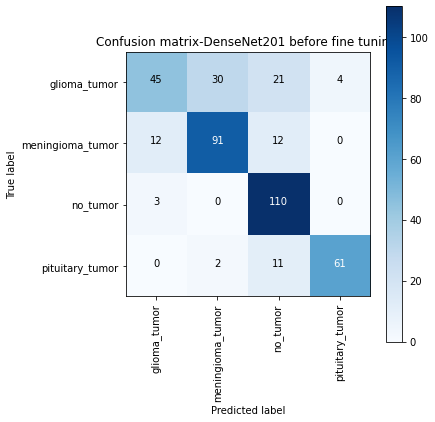

In [ ]:
import itertools
from itertools import chain
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix-DenseNet201 before fine tuning ',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(CATEGORIES))
    plt.xticks(tick_marks, CATEGORIES, rotation=90)
    plt.yticks(tick_marks, CATEGORIES)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


cm=confusion_matrix(y_test, y_pred_test_classes)
plot_confusion_matrix(cm, y_pred_test_classes)

In [ ]:
# unfreeze the weights in the base model, now these weights will be changed during training
basemodel.trainable = True

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# fine tune the model with very low learning rate
model.compile(loss = 'categorical_crossentropy', optimizer= opt , metrics= ["accuracy"])
history = model.fit(x_train_,y_train_encoded,  epochs = 5, validation_data= (x_test_,y_test_encoded))

Epoch 1/5
91/91 [==============================] - 69s 595ms/step - loss: 1.7846 - accuracy: 0.3974 - val_loss: 75017.1719 - val_accuracy: 0.2488
Epoch 2/5
91/91 [==============================] - 51s 562ms/step - loss: 0.9234 - accuracy: 0.6166 - val_loss: 269.3799 - val_accuracy: 0.2786
Epoch 3/5
91/91 [==============================] - 51s 562ms/step - loss: 0.7890 - accuracy: 0.6662 - val_loss: 11.0261 - val_accuracy: 0.3383
Epoch 4/5
91/91 [==============================] - 51s 562ms/step - loss: 0.7170 - accuracy: 0.7298 - val_loss: 11.3712 - val_accuracy: 0.3134
Epoch 5/5
91/91 [==============================] - 51s 562ms/step - loss: 0.5799 - accuracy: 0.7789 - val_loss: 3.7147 - val_accuracy: 0.2886


In [ ]:
# predict on the test dataset        
# Your code here
y_pred_test = model.predict(x_test_)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac= accuracy_score(y_test, y_pred_test_classes)

[INFO] evaluating network...
                  precision    recall  f1-score   support

    glioma_tumor       1.00      0.28      0.44       100
meningioma_tumor       0.60      0.97      0.74       115
        no_tumor       0.79      0.94      0.86       113
 pituitary_tumor       0.98      0.74      0.85        74

        accuracy                           0.75       402
       macro avg       0.84      0.73      0.72       402
    weighted avg       0.82      0.75      0.72       402



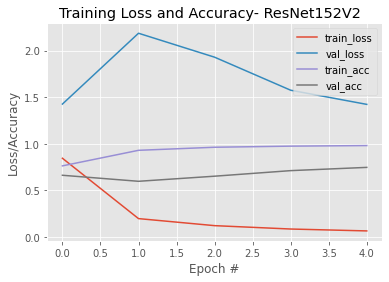

Accuracy of model=0.746268656716418


In [ ]:
from sklearn.metrics import classification_report


# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(x_test_, batch_size=32)
print(classification_report(y_test_encoded.argmax(axis=1),
predictions.argmax(axis=1), target_names=CATEGORIES))
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 5), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 5), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 5), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 5), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy- DenseNet201  ")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()
print("Accuracy of model="+str(ac))

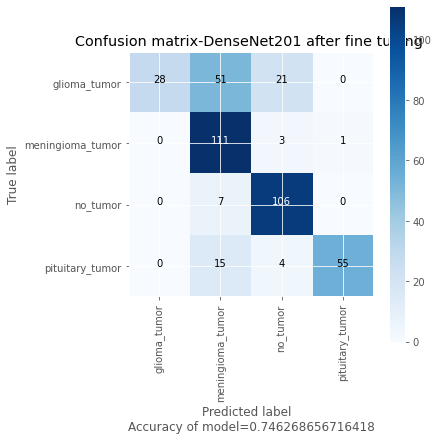

In [ ]:
import itertools
from itertools import chain
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix-DenseNet201 after fine tuning ',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(CATEGORIES))
    plt.xticks(tick_marks, CATEGORIES, rotation=90)
    plt.yticks(tick_marks, CATEGORIES)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label  \nAccuracy of model='+str(ac))
    plt.show()


cm=confusion_matrix(y_test, y_pred_test_classes)
plot_confusion_matrix(cm, y_pred_test_classes)